# Examples using Lorentzian model 

This objective of this notebook is to show how to use one of the models of 
the [QENSlibrary](https://github.com/QENSlibrary/QENSmodels) to perform some 
fits.

Two different modules will be used for fitting:
- `scipy.optimize.curve_fit`
- `lmfit`

In [1]:
# import python modules for plotting, fitting
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# import model from QENS library
import QENSmodels

The figure below illustrates this symmetric peak shape function with ScaleFactor=1, PeakCentre=0 and FWHM=0.5:

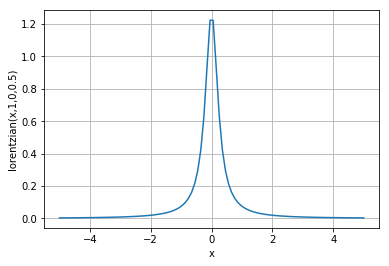

In [2]:
xx = np.linspace(-5,5,100)
plt.plot(xx, QENSmodels.lorentzian(xx, 1, 0, 0.5))
plt.xlabel('x')
plt.grid()
plt.ylabel('lorentzian(x,1,0,0.5)')
plt.show()

## Example: simple fit using scipy.optimize.curve_fit
**Input:** the reference data for this simple example correspond to a Lorentzian with added noise.

The fit is performed using `scipy.optimize.curve_fit`. <br> Examples are based on implementations from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Note that fitting could be performed with [`lmfit`](https://lmfit.github.io/lmfit-py/) or [`bumps`](http://bumps.readthedocs.io/en/latest/) instead of `scipy.optimize.curve_fit` (see Example using lmfit). 

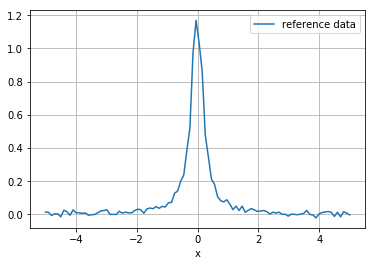

In [5]:
# Creation of reference data
lorentzian_noisy = QENSmodels.lorentzian(xx, 0.89, -0.025, 0.45)*(1+0.1*np.random.normal(0,1,100)) + 0.01*np.random.normal(0,1,100)
 
plt.plot(xx, lorentzian_noisy, label='reference data')

plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

In [6]:
# From https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# perform fit with initial guesses ScaleFactor=1, PeakCentre=0 FWHM=0.5
popt, pcov = curve_fit(QENSmodels.lorentzian, xx, lorentzian_noisy, p0=[1, 0, 0.5])
# Calculation of the errors on the refined parameters:
perr = np.sqrt(np.diag(pcov))
print 'Values of refined parameters:'
print 'ScaleFactor:', popt[0],'+/-', perr[0]
print 'PeakCentre :', popt[1],'+/-', perr[1]
print 'FWHM', popt[2],'+/-', perr[2]

Values of refined parameters:
ScaleFactor: 0.871526906813 +/- 0.0103108995721
PeakCentre : -0.0185119740612 +/- 0.00275175212271
FWHM 0.465416578185 +/- 0.00778886009021


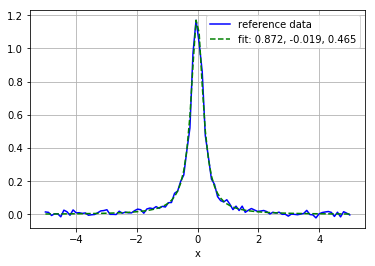

In [7]:
# Comparison of reference data with fitting result
plt.plot(xx, lorentzian_noisy, 'b-', label='reference data')
plt.plot(xx, QENSmodels.lorentzian(xx, *popt), 'g--', label='fit: %5.3f, %5.3f, %5.3f' % tuple(popt))
plt.legend()
plt.xlabel('x')
plt.grid()
plt.show()

## Example: simple fit  using lmfit
The following example uses the same data as in the main part of the document but the fitting is performed with [`lmfit`](https://lmfit.github.io/lmfit-py/) instead of `scipy.optimize.curve_fit`.

Names of parameters: ['scale_factor', 'peak_centre', 'fwhm']
Independent variable(s): ['x']
Result of fit:
[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 100
    # variables        = 3
    chi-square         = 0.068
    reduced chi-square = 0.001
    Akaike info crit   = -723.187
    Bayesian info crit = -715.372
[[Variables]]
    scale_factor:   0.87024734 +/- 0.014234 (1.64%) (init= 1)
    peak_centre:   -0.04419670 +/- 0.003723 (8.43%) (init= 0)
    fwhm:           0.45490592 +/- 0.010516 (2.31%) (init= 0.5)
[[Correlations]] (unreported correlations are <  0.100)
    C(scale_factor, fwhm)        =  0.707 



(<matplotlib.figure.Figure at 0x10ee1df50>,
 <matplotlib.gridspec.GridSpec at 0x10ee0f690>)

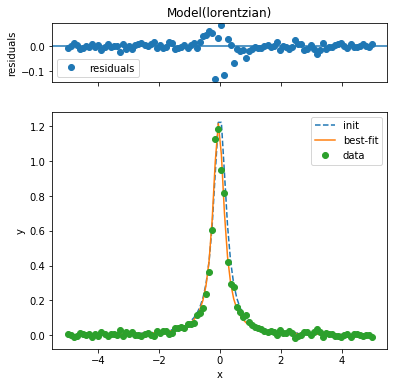

In [10]:
from lmfit import Model
import matplotlib.pyplot as plt
%matplotlib inline

gmodel = Model(QENSmodels.lorentzian)
print 'Names of parameters:', gmodel.param_names 
print 'Independent variable(s):', gmodel.independent_vars 

# Create array of reference data
xx = np.linspace(-5,5,100)
lorentzian_noisy = QENSmodels.lorentzian(xx, 0.89, -0.025, 0.45)*(1+0.1*np.random.normal(0,1,100)) + 0.01*np.random.normal(0,1,100)

# Fit
result = gmodel.fit(lorentzian_noisy, x=xx, scale_factor=1, peak_centre=0, fwhm=0.5)

# display result
print'Result of fit:\n',result.fit_report()

# plot
result.plot()